# Playing with things

## Import the required packages, data, and clean the data

In [4]:
exec(open("../Scripts/Packages.py").read())
exec(open("../Scripts/Data_Import.py").read())
exec(open("../Scripts/Data_Cleaning.py").read())

list(Appearances)
list(Salary_Analysis)

['yearID',
 'teamID',
 'lgID',
 'playerID',
 'salary',
 'birthCountry',
 'nameFirst',
 'nameLast',
 'weight',
 'height',
 'bats',
 'throws',
 'age',
 'yearsPlayed']

In [9]:
Salary_Analysis = pd.merge(Salary_Analysis, Appearances,  how='left', left_on=['yearID','teamID', 'playerID'], right_on = ['yearID','teamID','playerID'])

Salary_Analysis.head(10)

,yearID,teamID,lgID_x,playerID,salary,birthCountry,nameFirst,nameLast,weight,height,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1985,ATL,NL,barkele01,870000,USA,Len,Barker,225.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1985,ATL,NL,bedrost01,550000,USA,Steve,Bedrosian,200.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1985,ATL,NL,benedbr01,545000,USA,Bruce,Benedict,175.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1985,ATL,NL,campri01,633333,USA,Rick,Camp,195.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1985,ATL,NL,ceronri01,625000,USA,Rick,Cerone,192.0,71.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
5,1985,ATL,NL,chambch01,800000,USA,Chris,Chambliss,195.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0
6,1985,ATL,NL,dedmoje01,150000,USA,Jeff,Dedmon,200.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1985,ATL,NL,forstte01,483333,USA,Terry,Forster,200.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1985,ATL,NL,garbege01,772000,USA,Gene,Garber,175.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1985,ATL,NL,harpete01,250000,USA,Terry,Harper,195.0,76.0,...,0.0,0.0,0.0,129.0,0.0,2.0,131.0,0.0,13.0,0.0


Keep only applicable columns for this analysis

In [85]:
CoB_Analysis = Salary_Analysis.loc[:, ['birthCountry', 'salary'] ]

## Manually examine the differences in the group

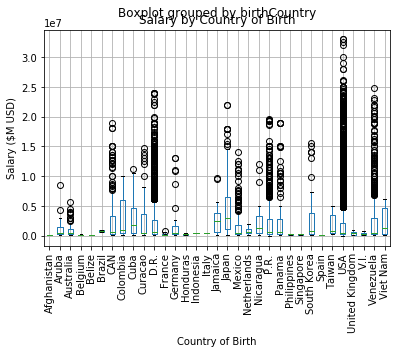

In [86]:
CoB_Analysis.boxplot(by = 'birthCountry', rot=90)
plt.title('Salary by Country of Birth')
plt.xlabel('Country of Birth')
plt.ylabel('Salary ($M USD)')
plt.show()

In [87]:
Country_Count = CoB_Analysis.groupby(['birthCountry']).count()
Country_Count.sort_values(by='salary', ascending = False)


,salary
birthCountry,
USA,19881
D.R.,2057
Venezuela,1045
P.R.,877
Mexico,322
CAN,297
Cuba,238
Japan,198
Panama,150


In [88]:
Country_Count2 = Country_Count.reset_index(inplace=True)
Top_15 = Country_Count.nlargest(15, 'salary')
List15 = Top_15['birthCountry'].tolist()
Filter_CoB_Analysis = CoB_Analysis.loc[CoB_Analysis['birthCountry'].isin(List15)]

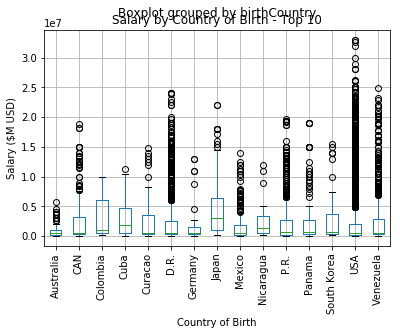

In [89]:
Filter_CoB_Analysis.boxplot(by = 'birthCountry', rot=90)
plt.title('Salary by Country of Birth - Top 10')
plt.xlabel('Country of Birth')
plt.ylabel('Salary ($M USD)')
plt.show()

## Use statistical testing to confirm the variance

NB: This probably should be using a friedman test as the variables are not really independent

Note: Unable to use ANOVA test due to the significant variations in standard deviations between the countries. 

In [90]:
Pivot = CoB_Analysis.pivot(columns='birthCountry', values='salary')

In [91]:
H, pval = mstats.kruskalwallis([Pivot[col] for col in Pivot.columns])


print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.001:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.001:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 337.645808329
P-Value: 1.038135794e-52
Reject NULL hypothesis - Significant differences exist between groups.
